In [13]:
import scanpy as sc
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import rc_context

In [14]:
sc.set_figure_params(dpi=300, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

scanpy==1.10.3 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.6 louvain==0.8.2 pynndescent==0.5.13


In [20]:
# Load the h5ad exported from seurat
adata = sc.read_h5ad("New_clusters_2.h5ad")
adata

AnnData object with n_obs × n_vars = 11686 × 26494
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'treatment', 'replicate', 'bc', 'percent.mt', 'name', 'RNA_snn_res.0.2', 'seurat_clusters', 'Label'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'

In [21]:
# Store normalized adata in to raw data
adata.raw = adata
sc.pp.scale(adata)

In [ ]:
# Save the updated H5
adata.write("seurat_allgenes.h5ad")

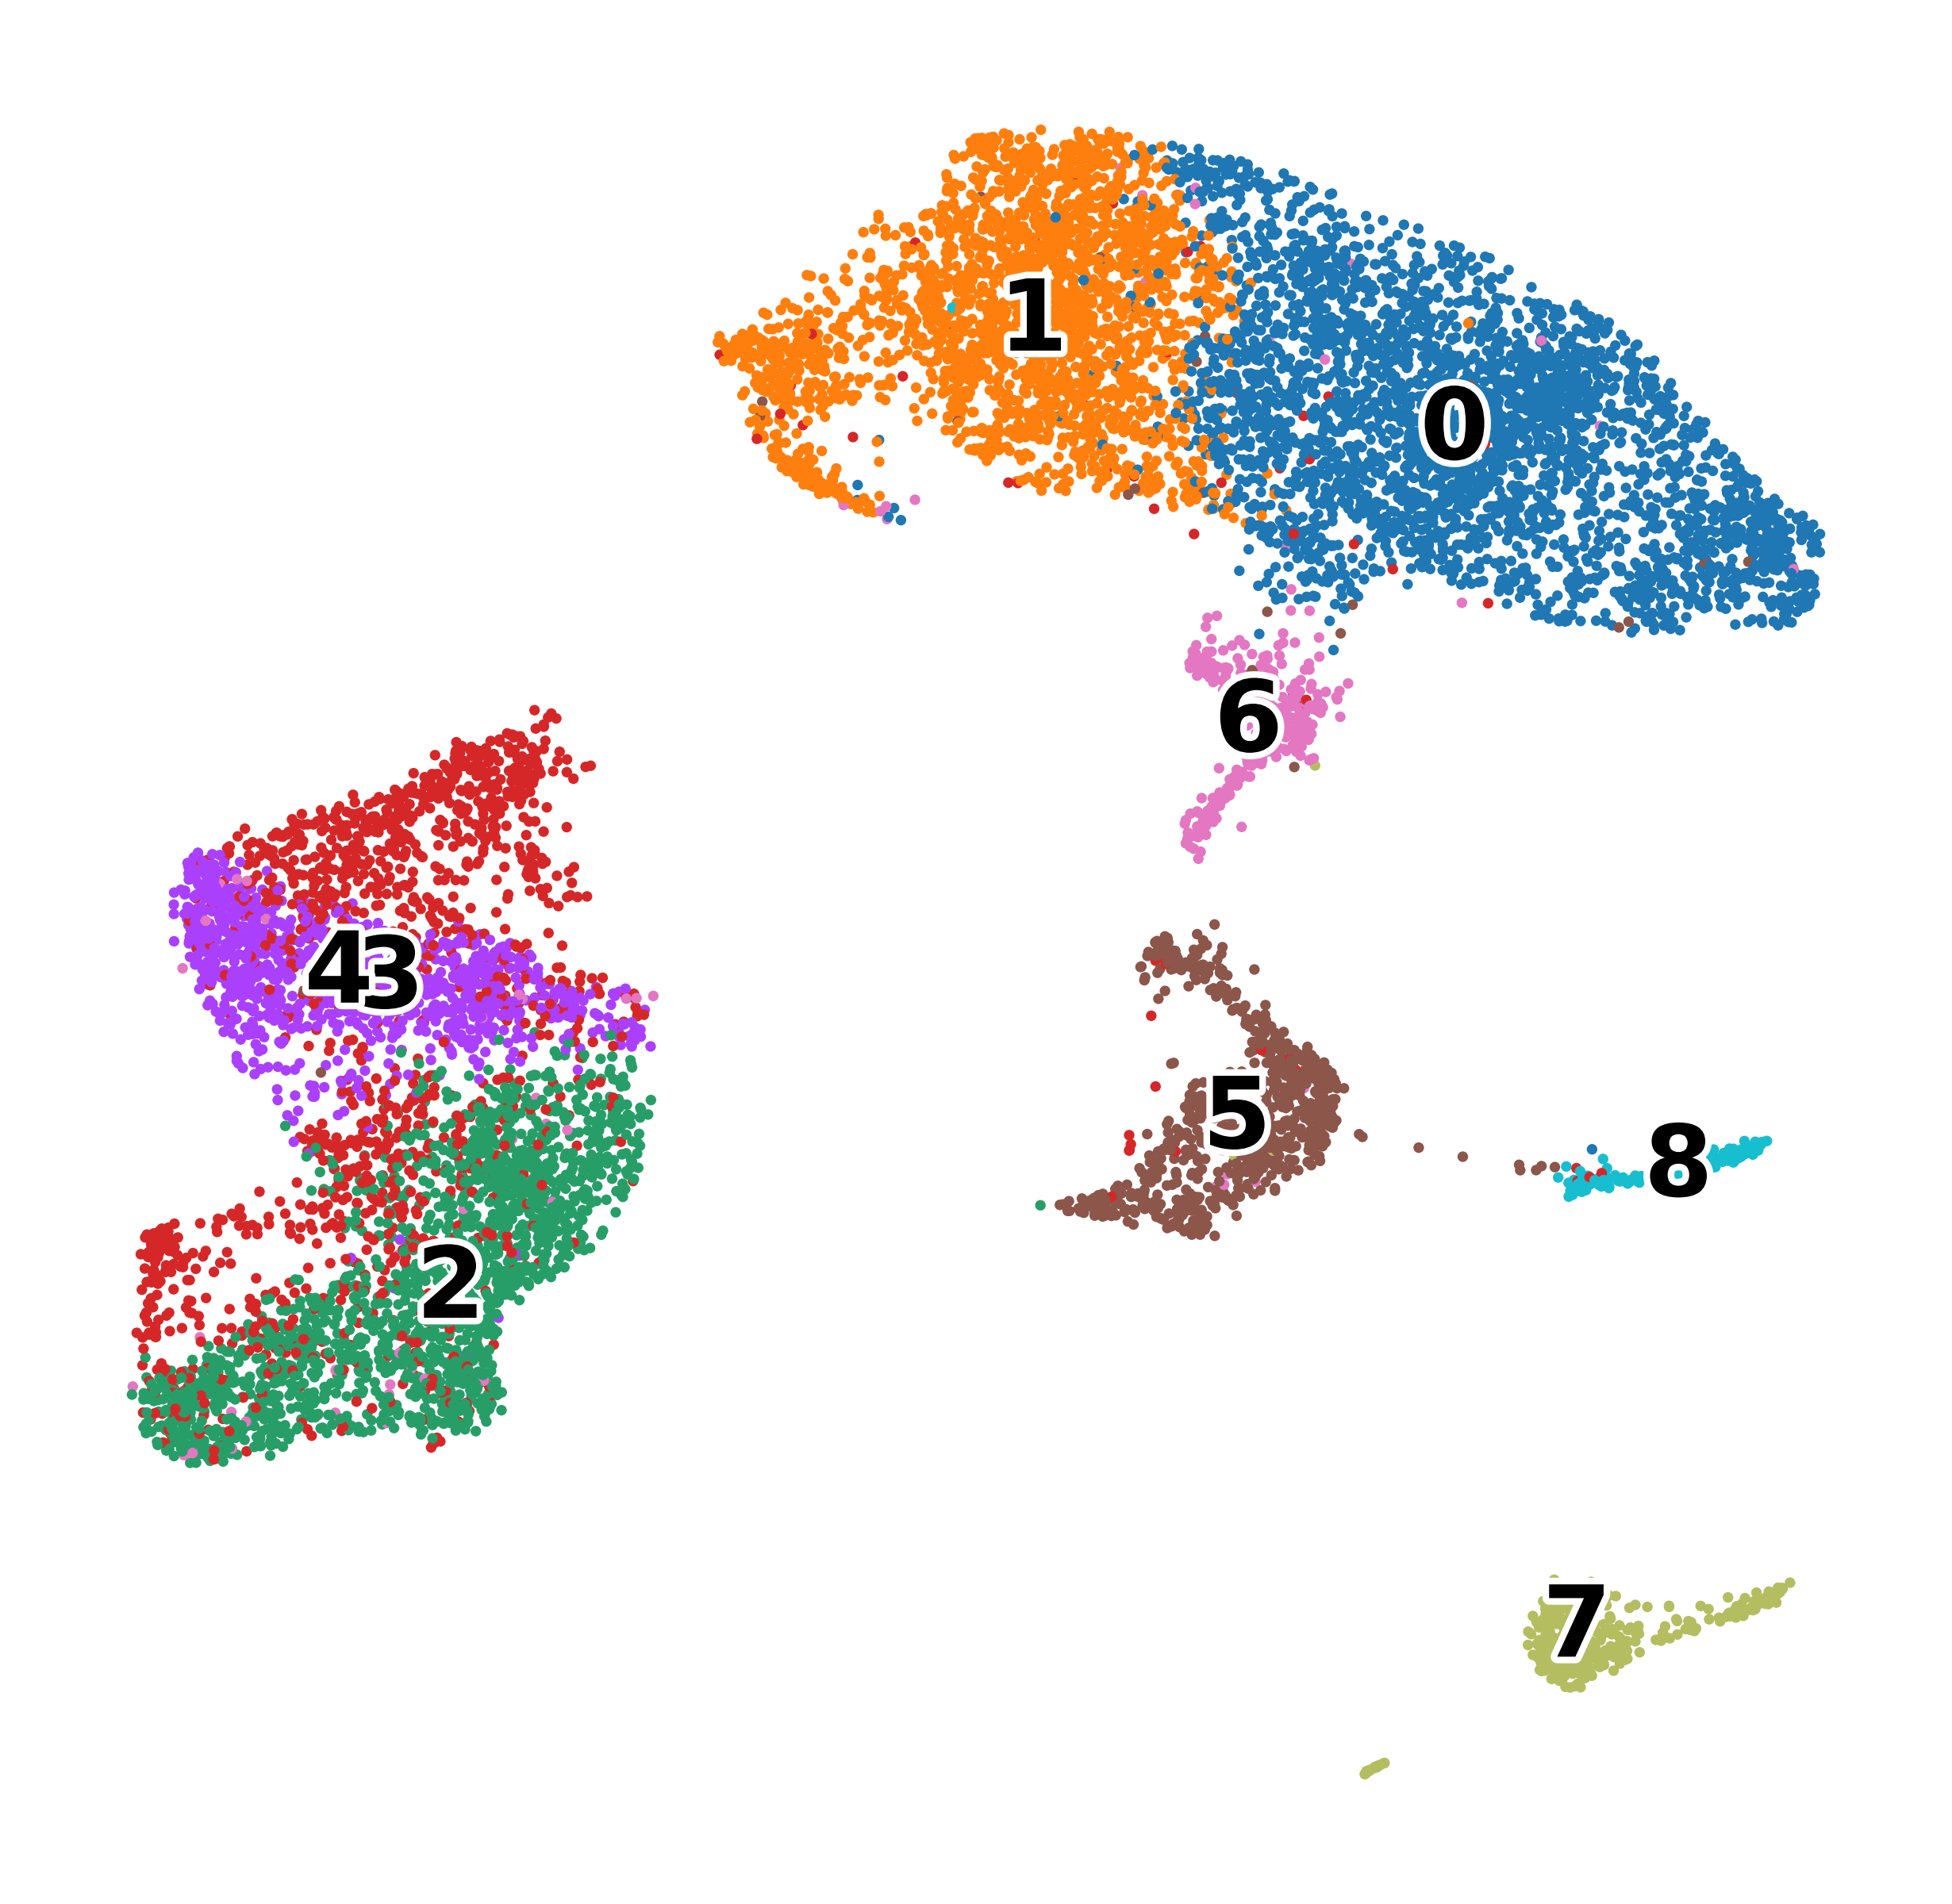

In [22]:
# Covert seurat_clusters to categorical
adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].astype("category")

# UMAP
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(adata, color = "seurat_clusters", legend_loc = "on data",
               frameon = False, legend_fontsize = 15, legend_fontoutline=2, title = "")

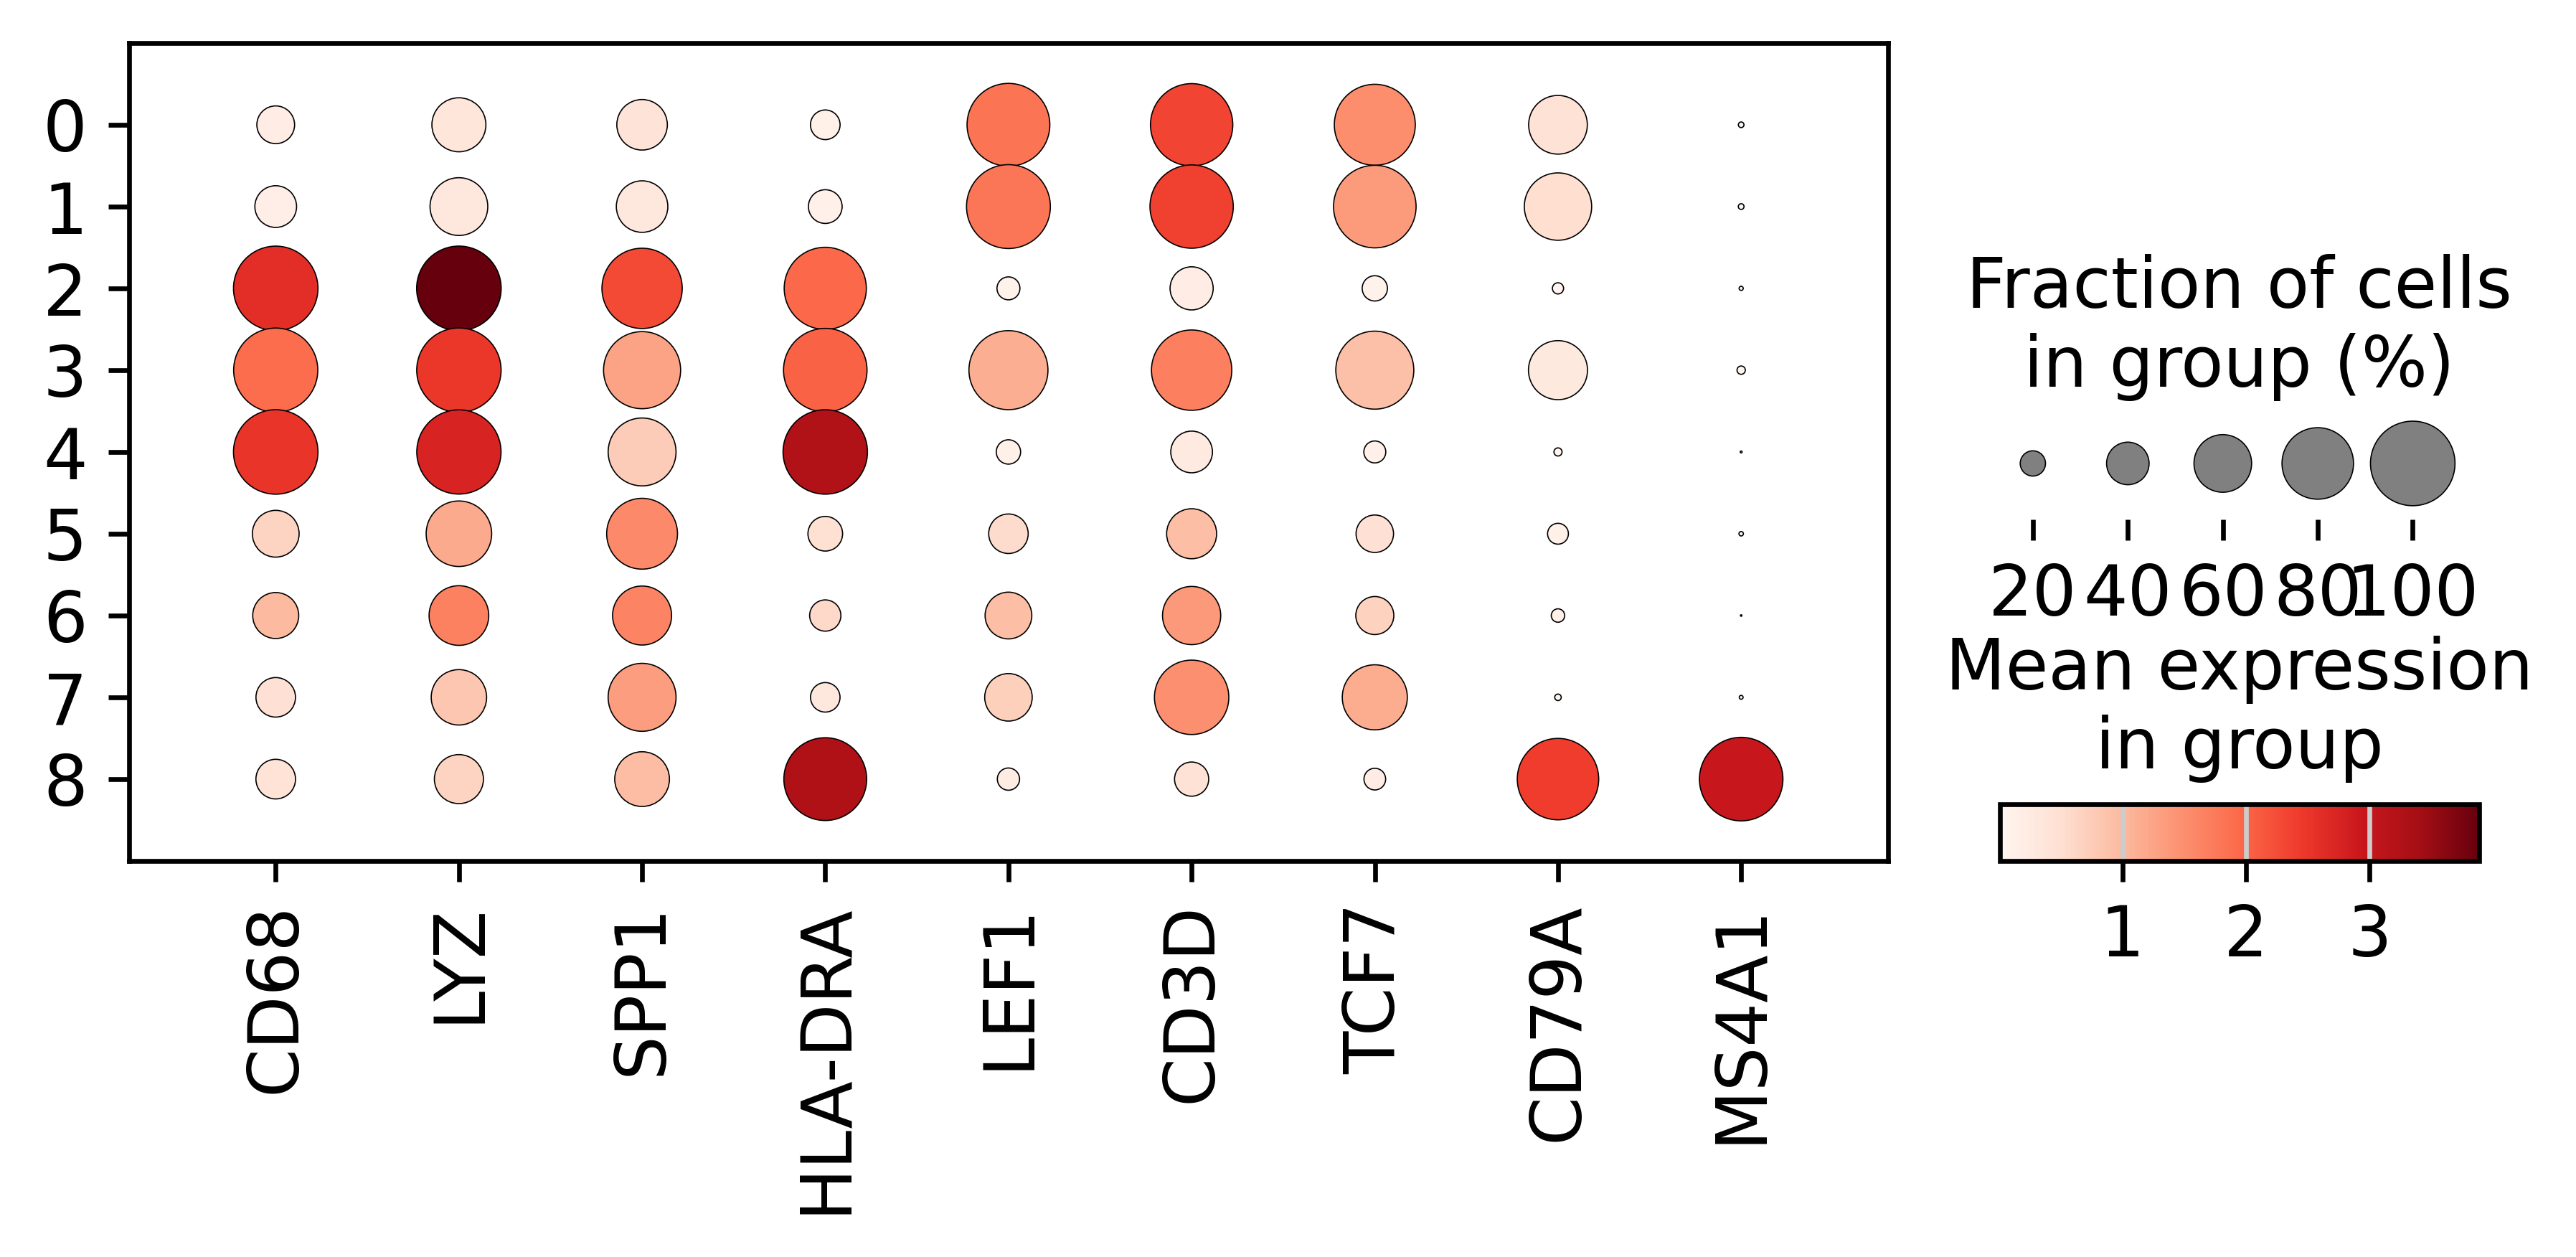

In [26]:
color_vars = ["CD68","LYZ","SPP1",
              "HLA-DRA","LEF1","CD3D",
              "TCF7","CD79A","MS4A1"]
sc.pl.dotplot(adata, color_vars, "seurat_clusters",figsize = (7,2.5))

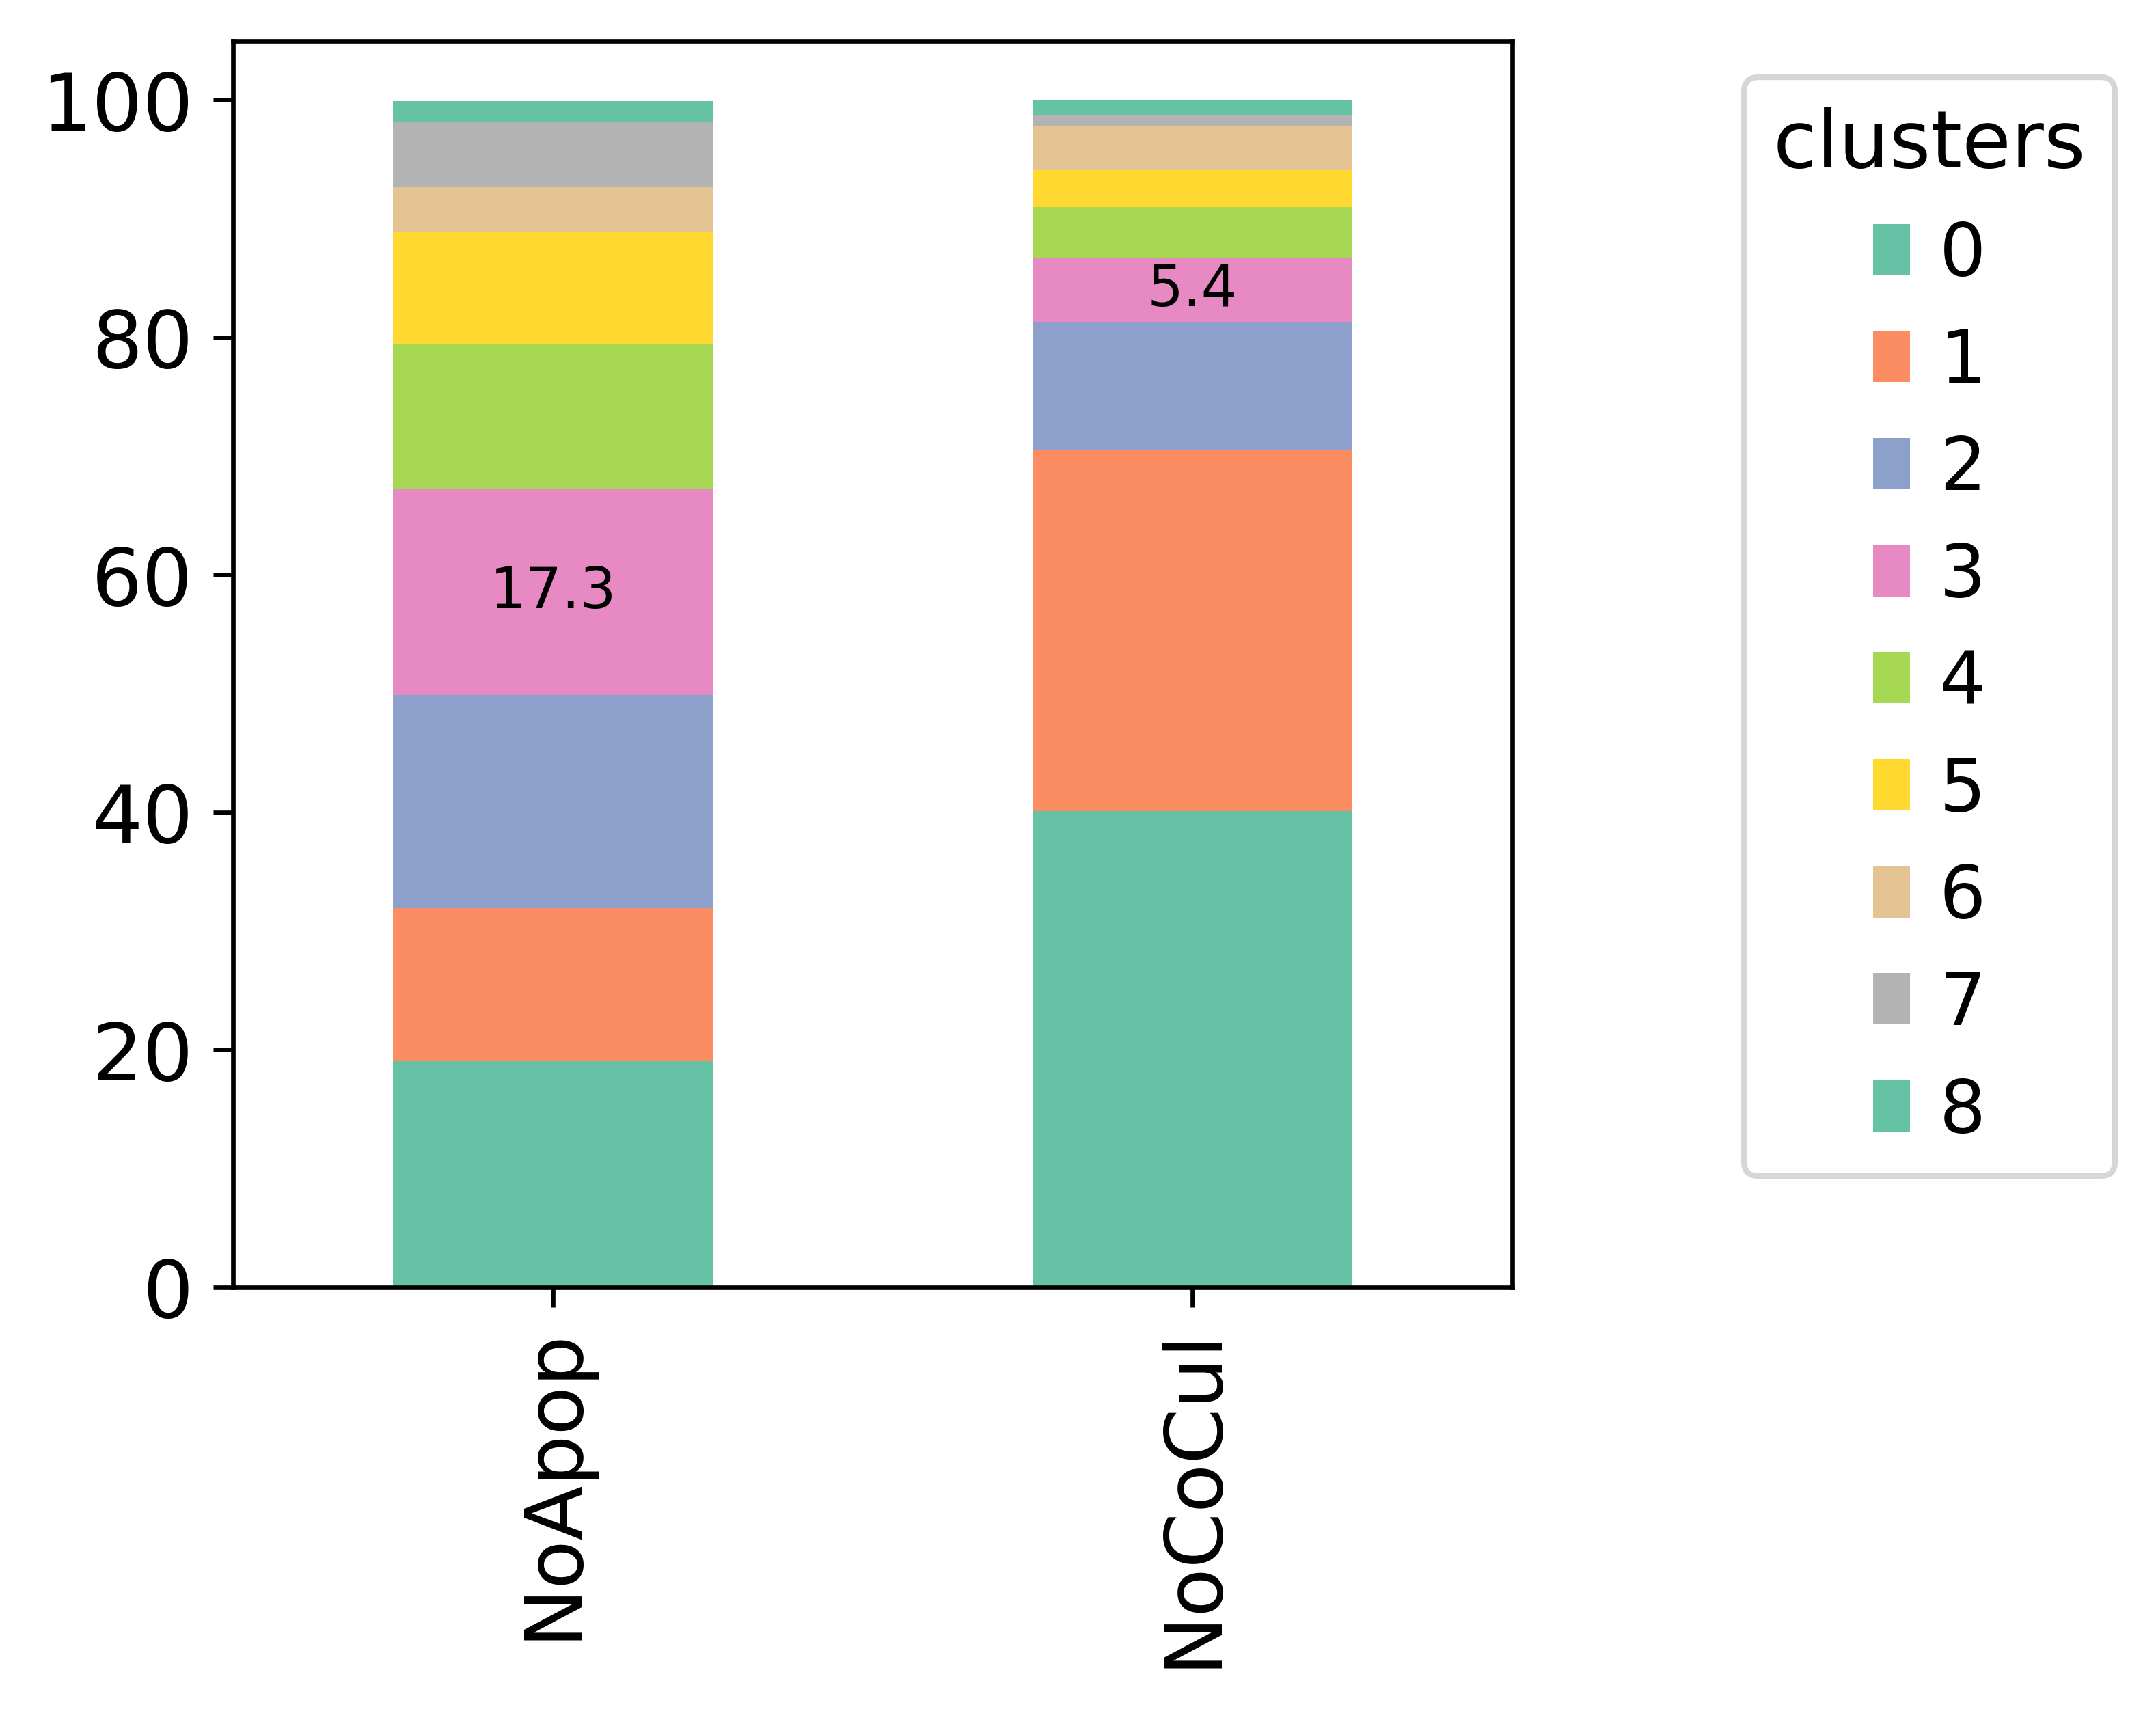

In [46]:
# Percentage of cell phenotype
# Add phenotype info in the adata metadata
# Extract data
df = pd.DataFrame(adata.obs)
df2 = round(pd.crosstab(df["seurat_clusters"], df["treatment"], normalize = "columns")*100,1)
ax =df2.T.plot(kind = "bar", stacked = True,color = sns.color_palette("Set2"))
ax.legend(title='clusters', bbox_to_anchor=(1.5, 1),loc='upper right')
ax.set_xlabel(None)
ax.grid(False)
for i, cell_type in enumerate(df2.index):
    if cell_type == "3":
        ax.bar_label(ax.containers[i], label_type = "center", color = 'black', fontsize = 10)